In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from datetime import datetime, timezone

In [2]:
import seaborn as sns
sns.set_theme()
sns.reset_defaults()

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
df = pd.read_json('netblocks-entity.json', lines=True, )
df = df[['url', 'date', 'content']]

In [5]:
df = df.set_index('date')

In [8]:
df.to_csv('netblocks.csv')
df[['url']].to_csv('netblocks-simple.csv')

In [6]:
def plot_freq(freq, name, n):

    resampled = pd.DataFrame({'count': df['url'].resample(freq).count().sort_index()})
    resampled['date'] = resampled.index.date

    plt.figure()
    fig, ax = plt.subplots()

    resampled.plot(x='date', y='count', kind='bar', ax=ax).legend([f'{name.title()} internet disruptions'])
    #ax.plot(resampled.date, resampled.count, kind='bar')
    #ax.axhline(y=3, color='green', linestyle='--', label='count students at initial start')

    # Fix date x tick labels
    # Fill all tick labels with empty values:
    ticklabels = [''] * len(resampled)
    # Divide series into n parts and show only label for start of part:
    # n = 18
    skip = len(resampled) // n
    # Format *only* every nth tick label as %Y-%m-%d
    ticklabels[::skip] = resampled['date'].iloc[::skip] # .strftime('%Y-%m-%d')
    ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
    # Auto-rotate labels 45deg, from https://matplotlib.org/2.0.2/users/recipes.html
    fig.autofmt_xdate()

    # Unused
    #fig.autofmt_xdate()
    #ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

    # Vertical line
    date = datetime(2022, 4, 10, 0, 0, tzinfo=timezone.utc)
    pos = resampled.index.get_loc(
        resampled.index[resampled.index == date][0]
    )
    #ax.axvline(pos, color='r', lw=1, label='Important date')

    # Doesn't do much?
    #ax.xaxis_date()

    ax.set_xlabel('')
    #plt.legend()

    filename = f'netblocks-{name}-disruptions'
    plt.savefig(f'{filename}.svg')
    plt.savefig(f'{filename}.png')
    plt.show()

<Figure size 1000x500 with 0 Axes>

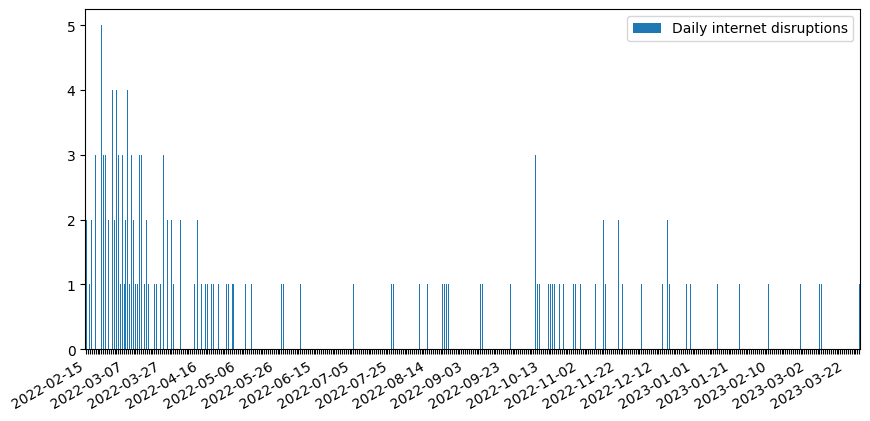

<Figure size 1000x500 with 0 Axes>

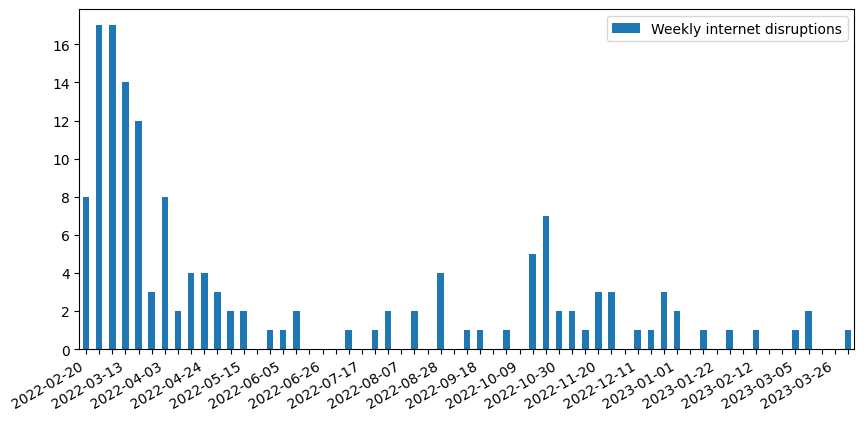

In [7]:
plot_freq('1d', 'daily', 20)
plot_freq('1w', 'weekly', 15)

In [8]:
import plotly.express as px

In [53]:
fig = px.bar(df['url'].resample('1w').count(), labels={'value': 'Disruptions'}).update_layout(
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0, pad=0),
).update_layout(showlegend=False)
fig.write_image("netblocks-weekly-disruptions.svg")
fig.show()

In [52]:
df_plotly = df['url'].resample('1d').count().rolling(7).mean()

fig = px.bar(
    df_plotly,
    #title='Weekly disruptions',
    text=df_plotly,
    labels={'date': '', 'value': 'Disruptions'},
)
fig.update_traces(textposition='outside')
# Hide axis labels
fig.update_layout(yaxis_visible=True, yaxis_showticklabels=True,
                  xaxis_visible=True, xaxis_showticklabels=True)
# Hide legend
fig.update_layout(showlegend=False)

# Disable margins and padding
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0, pad=0),
)

fig.write_image("netblocks-disruptions-7day-rolling-mean.svg")

fig.show()